# MSiA 422 Homework 2 -- Written by Parth Patel

## Write a a class that offers 2 functions that works exactly like the sorted() built-in function in python

### Report Table of Conents:

i) Package Imports & Class Definition<br>
ii) Sorting Methods Performance Comparison<br>
iii) Other Test Cases and Examples<br>

*** THE CODE IS MEANT TO BE RUN SEQUENTIALLY IN THIS NOTEBOOK
** Once the class defition is ran you can define instances and run things as you please.  Please refer to the text prior to the class definition to understand the args requried and the output

### Part i) Package Imports & Class Definition

import packages needed for reporting performance of the sort functions

In [11]:
import time  ##used for returning time measure when a given sort function is called on its own
import timeit ##used for coparing the two sort functions for reporting performance
import matplotlib.pyplot as plt  ##used for generating performance comparison plot
import random ##used for random generation of data for performance comparison and test cases

### Define the class that has bubble and merge sorting methods

Each class object must be initialized with three inputs:<br>
- iterable of objects: any list of objects (of the same type, e.g. list of numbers, list of strings, list of lists)<br>
- key: A custom key function can be supplied to customize the sort order, e.g. for sorting list can provide key str.lower(); defaults to None so do not supply anything unless desired<br>
- reversed: A flag field that allows the order of sort to be defined.  E.g. if descending order sort is desired supply True.  If ascending order is desired supply True or do not provide the arg as it is defaulted to True

The class has three methods defined:<br>
- get_list() returns the list that the class object was initialized with<br>
- bubble_sort() implements a bubble sort algorithm on inputted list and returns a tuple.  The tuple contains the following: (sorted list, number of comparison performed during sorting, number of swaps performed during sorting, time elapsed)<br>
- merge_sort() requires an additional input which is the list desired to be sorted (use get_list() method when calling) and it then applies a merge sort algorithm and returns a tuple.  The tuple contains the following: (sorted list, number of comparison performed during sorting, number of swaps performed during sorting, time elapsed

In [12]:
#class will inherit the base object class
class MySorted(object):
    '''
    A class that offers 2  sorting functions (bubble and merge algorithms) which receives inputs exactly like the sorted() built-in
    function in python.
    
    inputs: iterable of objects: any list of objects (of the same type, e.g. list of numbers, list of strings, list of lists)
    key: A custom key function can be supplied to customize the sort order, e.g. for sorting list can provide key str.lower(); defaults to None so do not supply anything unless desired
    reversed: A flag field that allows the order of sort to be defined. E.g. if descending order sort is desired supply True. If ascending order is desired supply True or do not provide the arg as it is defaulted to True
    
    '''
    #per instructions the class is required to have 3 input parameters: iterable of objects, key, and reversed. 
    def __init__(self,a_list,reverse=False,key_in=lambda x:x):
        self.list_in = a_list
        self.key = key_in
        if reverse == True or reverse == False:
            self.rev_flag = reverse
        else:
            raise ValueError("Reversed field supplied must be True or False")

    #method to return the supplied list
    def get_list(self):
        '''
        input: none (method of MySorted class instance)
        output: returns the iterable of objects for instance of class MySorted
        '''
        return self.list_in
    
    #class method for implementing a bubble sort algorithm to the supplied list
    def bubble_sort(self):
        '''
        input: none (method of MySorted class instance)
        output: method that sorts (via bubble sort algorithm) the iterable of objects associated for an instance of MySorted class
        '''
        start_time = time.time()
        nComp = 0
        nSwap = 0
        if self.rev_flag == False:
            for pass_num in range(len(self.list_in) - 1, 0, -1):
                for i in range(pass_num):
                    nComp += 1
                    if self.key(self.list_in[i]) > self.key(self.list_in[i + 1]):                
                        self.list_in[i],self.list_in[i + 1] = self.list_in[i + 1] ,self.list_in[i]
                        nSwap+=1
            end_time = time.time()
        else:
            for pass_num in range(len(self.list_in) - 1, 0, -1):
                for i in range(pass_num):
                    nComp += 1
                    if self.key(self.list_in[i]) < self.key(self.list_in[i + 1]):                
                        self.list_in[i],self.list_in[i + 1] = self.list_in[i + 1] ,self.list_in[i]
                        nSwap+=1
            end_time = time.time()
        return(self.list_in, nComp, nSwap,end_time-start_time)
    
    #class method for implementing a merge sort algorithm to the supplied list
    def merge_sort(self,a_list):
        '''
        input: iterable of objects (use get_list() method on desired instance of MySorted as the arg when calling)
        output: method that sorts (via merge sort algorithm) the iterable of objects associated for an instance of MySorted class
        '''
        nComp = 0
        nSwap = 0
        lft_comp = 0
        rgt_comp = 0
        lft_swap = 0
        rgt_swap = 0
        start_time = time.time()
        if len(a_list) > 1:   
            mid = len(a_list) // 2
            left_half = a_list[:mid]
            right_half = a_list[mid:]
            _,lft_comp,lft_swap,_ = self.merge_sort(left_half)
            _,rgt_comp,rgt_swap,_ = self.merge_sort(right_half)

            i = 0
            j = 0
            k = 0

            if self.rev_flag == False:
                while i < len(left_half) and j < len(right_half):
                    nComp += 1
                    if self.key(left_half[i]) < self.key(right_half[j]):
                        nSwap+=1
                        a_list[k] = left_half[i]
                        i = i + 1
                    else:
                        a_list[k] = right_half[j]
                        j = j + 1
                    k = k + 1
            else:
                while i < len(left_half) and j < len(right_half):
                    nComp += 1
                    if self.key(left_half[i]) > self.key(right_half[j]):
                        nSwap+=1
                        a_list[k] = left_half[i]
                        i = i + 1
                    else:
                        a_list[k] = right_half[j]
                        j = j + 1
                    k = k + 1

            while i < len(left_half):
                a_list[k] = left_half[i]
                i = i + 1
                k = k + 1

            while j < len(right_half):
                a_list[k] = right_half[j]
                j = j + 1
                k = k + 1
        end_time = time.time()
        return(a_list,nComp+lft_comp+rgt_comp,nSwap+lft_swap+rgt_swap,end_time-start_time)


### Part ii) Package Imports & Class Definition

The function, compare_times, below generates random lists of specified sizes and then calls 3 different sorting function (bubble, merge, sorted) to sort the same list and record the time elapsed for each to excecute the task.  The function returns a list of lists that contains the execution time for different sized lists across each of the three methods.  E.g. t1 contains the time required to sort lists of different specified lengths for the bubble sort, t2 contains the same info but for merge sort, and t3 for sorted

In [13]:
def compare_times():
    '''
    Def: generates random lists of specified sizes\
    Input: None
    Output: returns a list of lists that contains the execution time for different sized lists across three (bubble, merged, Sorted) sorting algorithms
    '''
    N_vals = [10,100,200,500]
    t1 = []
    t2 = []
    t3 = []
    for n in N_vals:
        l = [random.randint(0,100) for i in range(n)]
        inp1 = MySorted(l,False)
        inp2 = MySorted(l,False)
        
        t1.append(timeit.timeit(lambda:inp1.bubble_sort(),number =1))
        t2.append(timeit.timeit(lambda: inp2.merge_sort(inp2.get_list()),number =1))
        t3.append(timeit.timeit(lambda: sorted(l),number =1))
        
    return [t1,t2,t3]

Call the function to gather execution time information

In [14]:
times_bubble, times_merge, times_sorted = compare_times()

Plot the comparison results

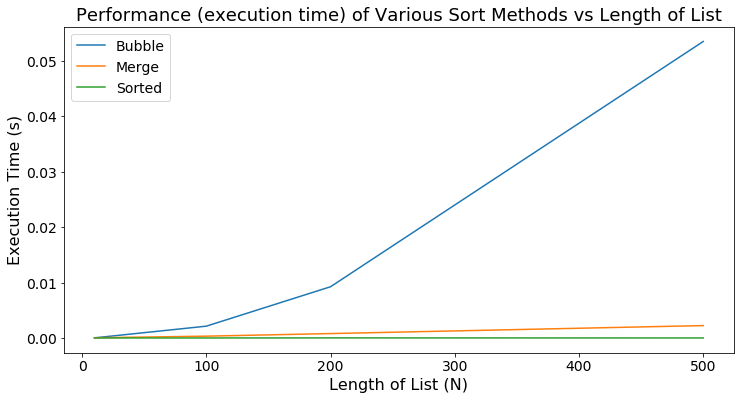

In [15]:
N_vals = [10,100,200,500]
plt.figure(figsize = (12,6))
plt.plot(N_vals,times_bubble,label = 'Bubble')
plt.plot(N_vals,times_merge, label = 'Merge')
plt.plot(N_vals,times_sorted, label = 'Sorted')
plt.xlabel('Length of List (N)',fontsize=16)
plt.ylabel('Execution Time (s)',fontsize=16)
plt.title('Performance (execution time) of Various Sort Methods vs Length of List',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 14)

Summary table of the comparison results

In [16]:
import pandas as pd
pd.DataFrame([times_bubble, times_merge, times_sorted])

,0,1,2,3
0,0.000025,0.002132,0.009250,0.053519
1,0.000040,0.000328,0.000797,0.002238
2,0.000002,0.000003,0.000016,0.000006


In [17]:
df= pd.DataFrame({'Length of List(N)':N_vals,'Bubble Sort Time (s)': times_bubble,'Merge Sort Time (s)': times_merge,'Sorted Sort Time (s)': times_sorted})
df

,Length of List(N),Bubble Sort Time (s),Merge Sort Time (s),Sorted Sort Time (s)
0,10,0.000025,0.000040,0.000002
1,100,0.002132,0.000328,0.000003
2,200,0.009250,0.000797,0.000016
3,500,0.053519,0.002238,0.000006


In [18]:
df.describe()

,Length of List(N),Bubble Sort Time (s),Merge Sort Time (s),Sorted Sort Time (s)
count,4.000000,4.000000,4.000000,4.000000
mean,202.500000,0.016232,0.000851,0.000007
std,212.974959,0.025170,0.000976,0.000007
min,10.000000,0.000025,0.000040,0.000002
25%,77.500000,0.001606,0.000256,0.000002
50%,150.000000,0.005691,0.000563,0.000004
75%,275.000000,0.020317,0.001157,0.000008
max,500.000000,0.053519,0.002238,0.000016


### Part iii) Other Test Cases and Examples

#### Verify that the bubble and merge algorithms work on lists comprised of different object types

test on list of strings

In [19]:
#List of string
list_of_str = ['name','my','parth','is','msia','python','java']

#create class instance
str_test = MySorted(list_of_str)
str_test2 = MySorted(list_of_str)

#test on bubble
print(str_test.bubble_sort())

#test on merge
print(str_test2.merge_sort(str_test2.get_list()))

(['is', 'java', 'msia', 'my', 'name', 'parth', 'python'], 21, 12, 0.0)
(['is', 'java', 'msia', 'my', 'name', 'parth', 'python'], 9, 9, 0.0)


test on list of numbers

In [20]:
#list of random ints
list_of_num = [random.randint(0,100) for i in range(10)]
print(list_of_num)
#create class instance
num_test = MySorted(list_of_num)
num_test2 = MySorted(list_of_num)

#test on bubble
print(num_test.bubble_sort())

#test on merge
print(num_test2.merge_sort(num_test2.get_list()))

[51, 42, 35, 41, 33, 6, 38, 100, 68, 81]
([6, 33, 35, 38, 41, 42, 51, 68, 81, 100], 45, 19, 0.0)
([6, 33, 35, 38, 41, 42, 51, 68, 81, 100], 15, 15, 0.0)


test on list of lists

In [21]:
list_of_lst = [['name','my'],['python','java'],['a'],['parth','is','msia']]

#create class instance
lst_test = MySorted(list_of_lst)
lst_test2 = MySorted(list_of_lst)

#test on bubble
print(lst_test.bubble_sort())

#test on merge
print(lst_test2.merge_sort(lst_test2.get_list()))

([['a'], ['name', 'my'], ['parth', 'is', 'msia'], ['python', 'java']], 6, 3, 0.00099945068359375)
([['a'], ['name', 'my'], ['parth', 'is', 'msia'], ['python', 'java']], 4, 4, 0.0)


#### Verify that the reversed option works as intended on both bubble and merge

In [22]:
#list of random ints
list_of_num = [random.randint(0,100) for i in range(10)]
print(list_of_num)
#create class instance
num_test = MySorted(list_of_num,reverse=True)
num_test2 = MySorted(list_of_num,reverse=True)

#test on bubble
print(num_test.bubble_sort())

#test on merge
print(num_test2.merge_sort(num_test2.get_list()))

[24, 80, 57, 67, 24, 14, 11, 49, 29, 57]
([80, 67, 57, 57, 49, 29, 24, 24, 14, 11], 45, 18, 0.0)
([80, 67, 57, 57, 49, 29, 24, 24, 14, 11], 17, 15, 0.0)


#### Verify that the key arg works as intended on both bubble and merge

In [23]:
#List of string
test40 = [90, 'a', 'z', 'c']

#key arg
key = lambda x:sum([ord(item) for item in str(x)])

#create class instance
str_test = MySorted(test40,key_in=key)
str_test2 = MySorted(test40,key_in=key)

#test on bubble
print(str_test.bubble_sort())

#test on merge
print(str_test2.merge_sort(str_test2.get_list()))

(['a', 'c', 90, 'z'], 6, 3, 0.0)
(['a', 'c', 90, 'z'], 4, 4, 0.0)
